In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import LinearRegression

## **Loading the Data**

The given data is loaded from the `.csv` format and convered into a pandas dataframe. To verify if the data is loaded correctly, check the first five rows (head) of the dataframe.
If this step fails, the loading of the data is incorrect.


In [2]:
# Load the data
path: str = r"Datasets\Question-3\Real Estate.csv"
df: pd.DataFrame = pd.read_csv(path)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### **Preprocessing the Data**

The data is preprocessed to remove the unwanted columns and null values.

In [3]:
# Drop the Unnamed id column and nan rows
df.dropna(inplace=True)
df.drop("No", axis=1, inplace=True)

In [4]:
# Rename columns for ease of access
old_cols: list = list(df.columns)
new_cols: list = ["X1", "X2", "X3", "X4", "X5", "X6", "Y"]
df.rename(columns=dict(zip(old_cols, new_cols)), inplace=True)

In [5]:
# Normalize the data
outcome = df["Y"]
df.drop("Y", axis=1, inplace=True)
df = (df - df.min()) / (df.max() - df.min())
df["Y"] = outcome
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,43.1


### **Data Anaysis**

The data is plotted on graphs to find our patterns and relationships among the features.

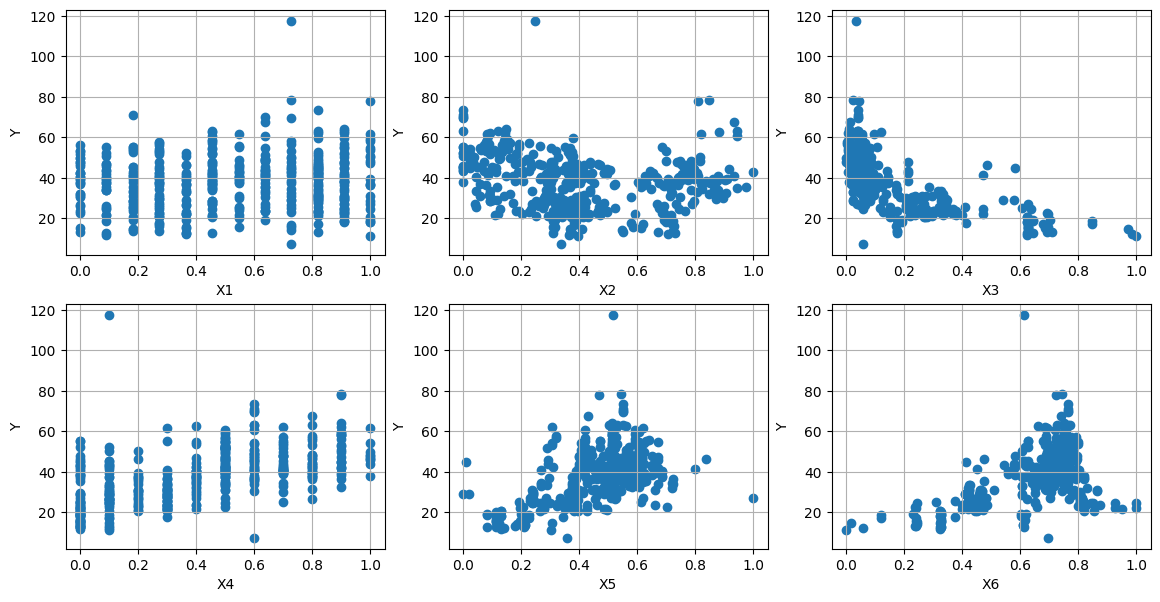

In [6]:
plot = plt.figure(figsize=(14, 7))

for i, col in enumerate(df.columns):
    if col == "Y":
        continue
    plot.add_subplot(2, 3, i+1)
    plt.scatter(df[col], df["Y"])
    plt.xlabel(col)
    plt.ylabel("Y")
    plt.grid(True)

plt.show()

## **Train-Test Split**

Since the test set is not provided, the training set is split into test sets using a randomized 80-20 split.

In [7]:
# Shuffle the data
train_size: int = int(0.8 * df.shape[0])
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing
x_train: np.ndarray = df.iloc[:train_size, :-1].values
y_train: np.ndarray = df.iloc[:train_size, -1].values
x_test: np.ndarray = df.iloc[train_size:, :-1].values
y_test: np.ndarray = df.iloc[train_size:, -1].values

### **Perform Linear Regression**

Having preprocessed and analysed the data, we now perform linear regression on the data.
The data is fitted into `LinearRegression` implemented in `utils.py` and its predictions on the test data are noted.

In [8]:
# Train the model for the data
model = LinearRegression(x_train, y_train)
model.train()

### **Model Evaluation**

The model is evaluated using the Coefficient of Determination or $R^{2}$ method and the Root Mean Squared Error (RMS) method.

In [9]:
# Check the R2 Score of the model
print("R² Score:", model.r2_score(x_test, y_test))

R² Score: 0.6982757283570986


In [10]:
# Check the RMSE of the model
print("RMS Error:", model.rmse(x_test, y_test))

RMS Error: 8.162205608416974


## **Linear Regression using the Normal Equation**

The Linear Regression model in `utils.py` is implemented using the [Normal Equation](https://en.wikipedia.org/wiki/Ordinary_least_squares#Normal_equations) for Linear Regression.

The Normal Equation is derived by minimizing the Mean Squared Error (MSE) of the predicted values.

### **Deriving the Normal Equation**

Let the predicted value of a data sample $x$ be given by $h_{\theta}(x)$ and the MSE be given by $J(\theta)$, then,

$$\begin{align*}
h_{\theta}(x) &= \sum_{j=0}^{n} \theta_{i}x_{i} = \theta^{T}x \\
J(\theta) &= \frac{1}{m} \sum_{i=1}^{m}(y_{i} - h_{\theta}(x_{i}))^{2}
\end{align*}$$

where $x_{0} = 1$ and each $x_{i} \ (1 \le i \le m)$ is the $i$-th data sample from a set of $m$ samples having $n$ features each, and $y_{i}$ is its corresponding target value. 

Let $X$ be the matrix of $m$ rows where the $i$-th row represents the sample $x_{i}$, and $y$ be the column vector $(y_{1}, y_{2}, ..., y_{n})$ Then, 

$$\begin{align*}
J(\theta) &= \frac{1}{m} (X\theta - y)^{T} (X\theta - y) \\
&= \frac{1}{m} ((X\theta)^{T} - y^{T}) (X\theta - y) \\
&= \frac{1}{m} \left( (X\theta)^{T}X\theta - (X\theta)^{T}y - y^{T}(X\theta) + y^{T}y \right)
\end{align*}$$

Note that since $X$, $\theta$, and $y$ are vectors,

$$(X\theta)^T y = \theta^{T}X^T y = y^{T} X\theta$$
$$\implies J(\theta) = \theta^{T} X^{T} X\theta - 2(X\theta)^T y + y^{T}y$$

To minimize the function $J(\theta)$, we set its derivative with respect to $\theta$ equal to zero.

$$\begin{align*}
\frac{dJ(\theta)}{d\theta} &= 2 X^{T} X\theta - 2 X^{T}y = 0 \\
&\implies X^{T} X\theta = X^{T} y \\
&\implies \theta = (X^{T} X)^{-1} X^{T} 
\end{align*}$$

assuming $X^{T}X$ is invertible. This is the Normal Equation.

### **Limitations of the Normal Equation Method**

- **Computational Complexity:** If $X^{T}X$ is a large matrix, calculating its inverse may be a computationally heavy task, which works out to around $O(N^{3})$.
- **Numerical Instability:** If $X^{T}X$ is a non-intertible matrix or the features of $X$ are linearly dependent, the Normal Equation cannot be used.
- **Outliers:** The normal equation is sensitive to outliers in data.
- **Overfitting:** It can lead to overfitting the data when less data is available as compared to the number of featuers.